In [1]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sn

In [2]:
df = pd.read_csv('csv/WineQT.csv')

In [3]:
df.shape

(1143, 13)

In [4]:
df.drop(columns='Id')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
print(df.quality.value_counts())

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

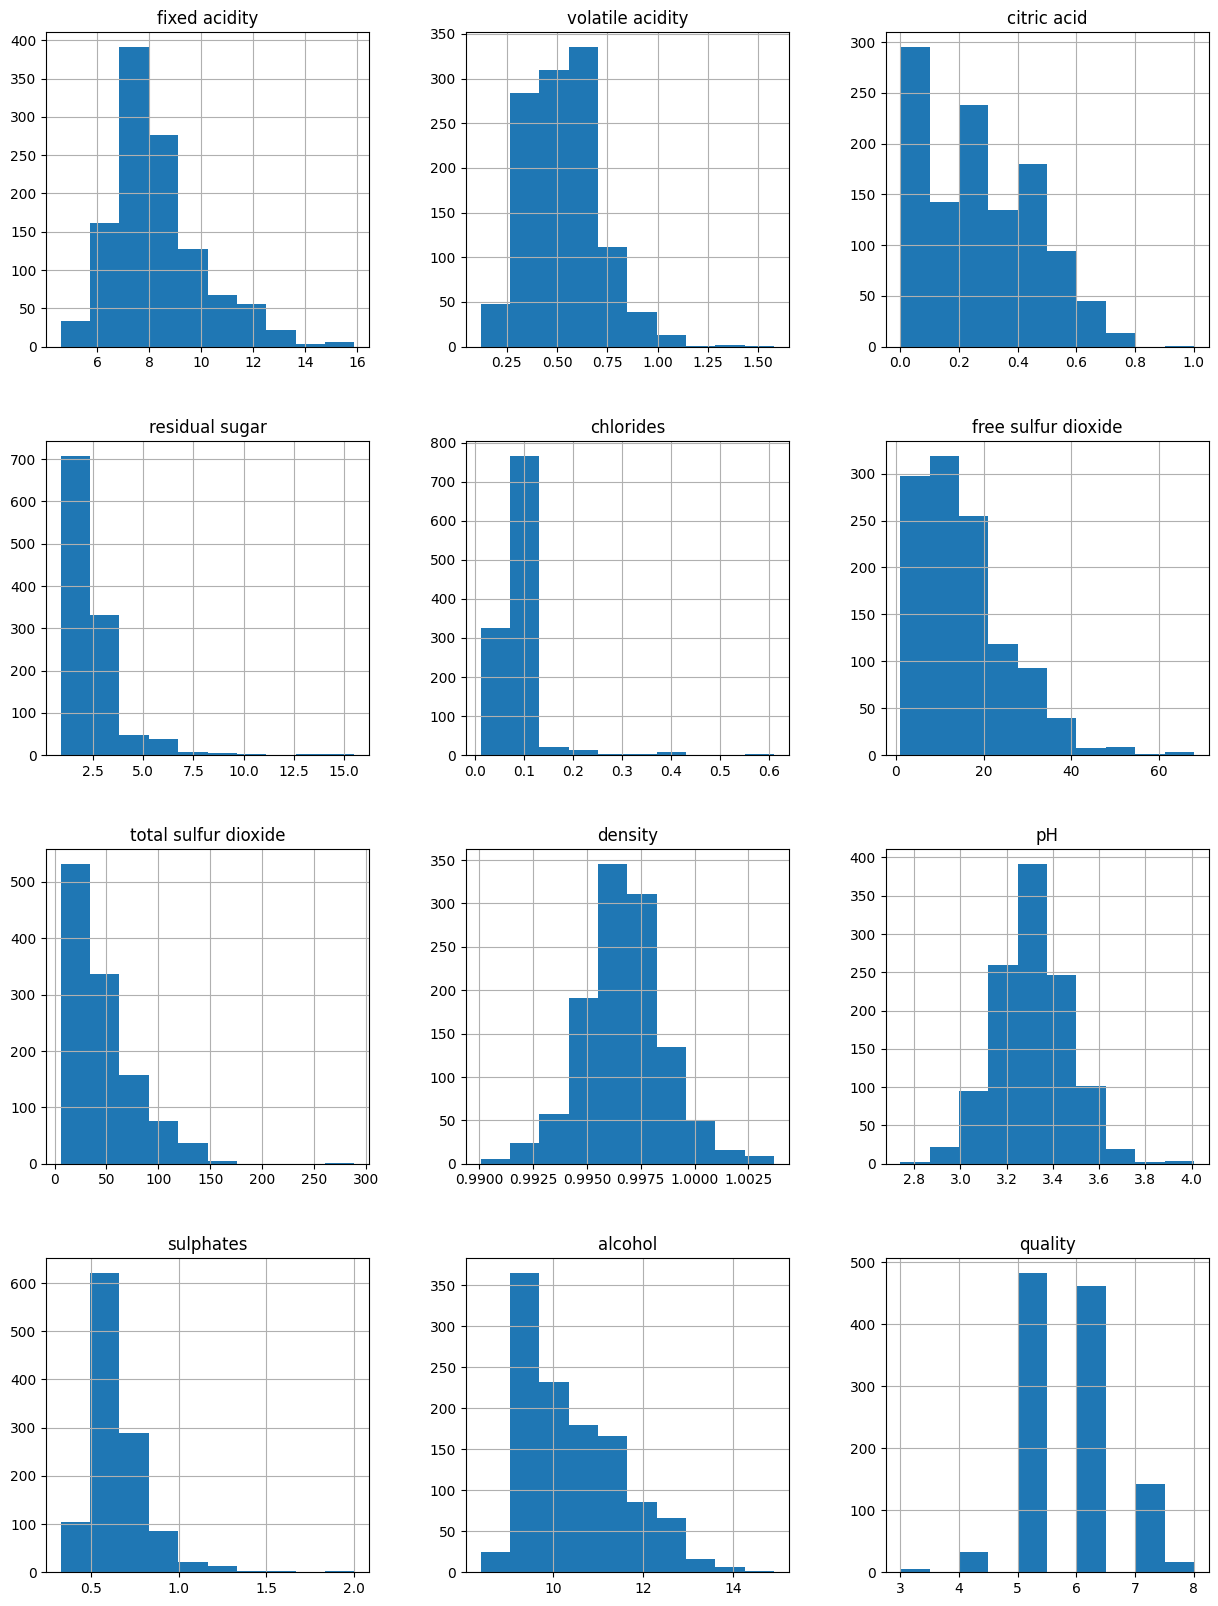

In [7]:
df_no_id = df.drop(columns="Id")
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_no_id.hist(bins=10,ax = ax)

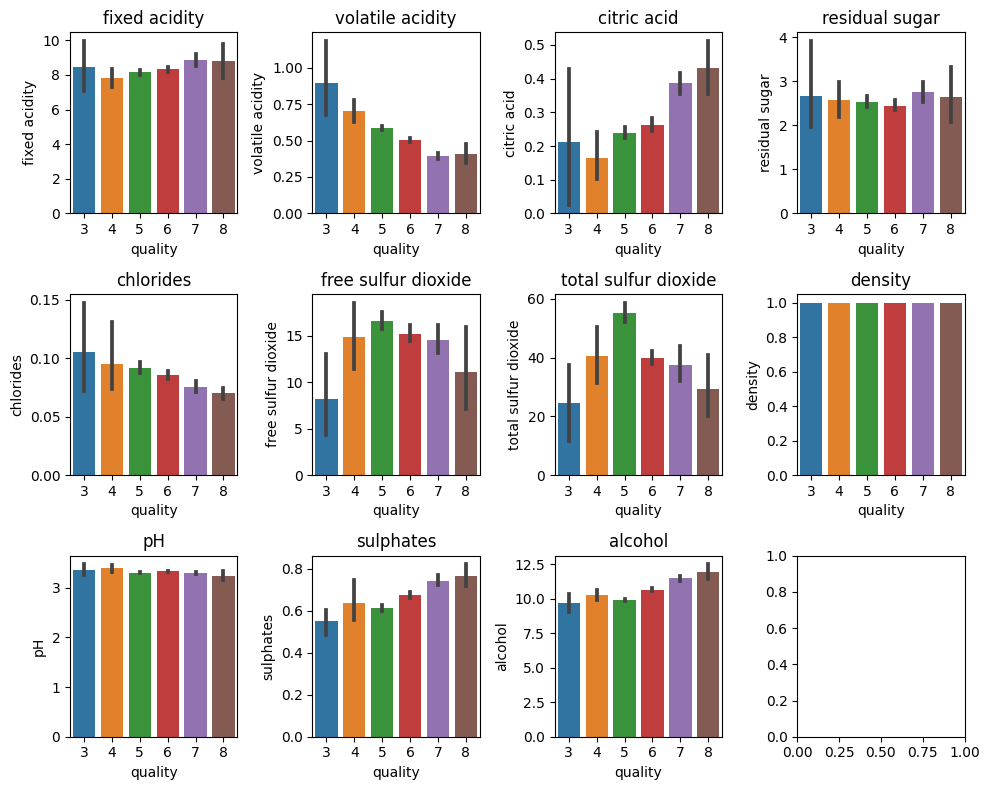

In [8]:
vars_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))
axs = axs.flatten()

for i, var in enumerate(vars_to_plot):
    sn.barplot(x='quality', y=var, data=df, ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()

plt.show()


<Axes: >

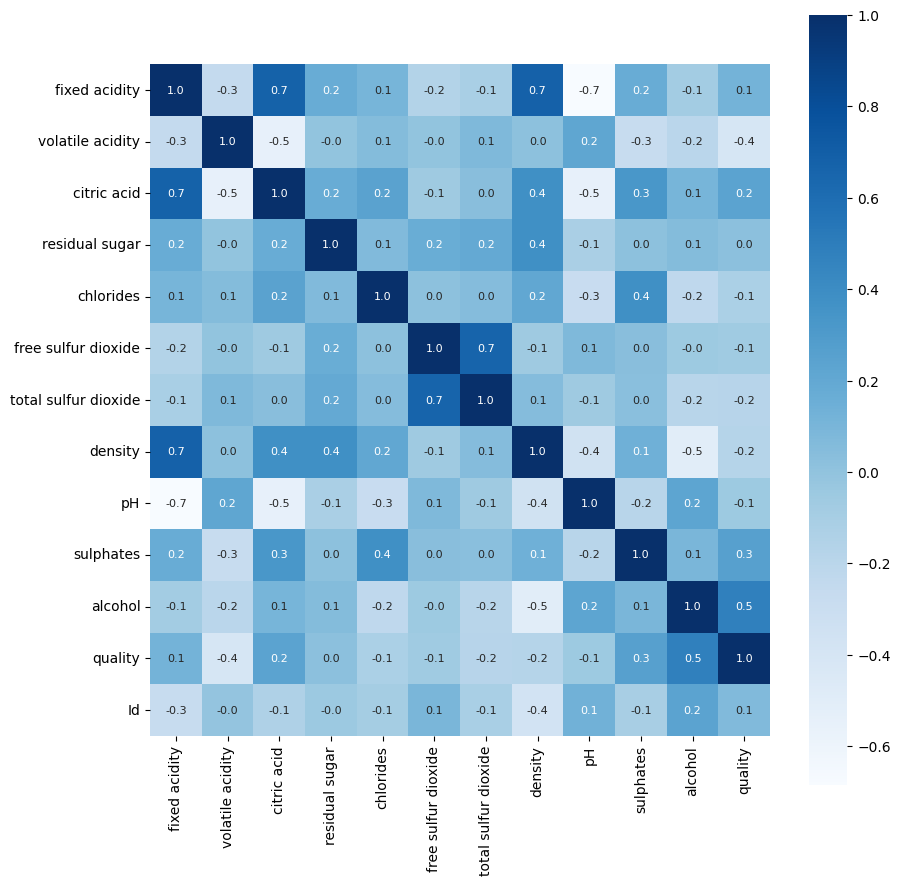

In [9]:
correlation = df.corr().drop(columns='Id')
#Heatmap för korrelation 
plt.figure(figsize=(10,10))
sn.heatmap(correlation, cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

In [10]:
X = df.drop(columns=['quality','Id'])
y = df['quality']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.3, random_state=42)

In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
#Prediction
y_pred_en = clf.predict(X_test)
y_pred_en

y_pred_train = clf.predict(X_train)
y_pred_train

array([5, 5, 5, 5, 7, 5, 6, 5, 5, 6, 5, 5, 5, 6, 7, 5, 5, 7, 6, 7, 6, 6,
       5, 7, 4, 6, 6, 6, 5, 5, 5, 5, 6, 5, 7, 6, 6, 6, 6, 7, 7, 7, 7, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 8, 5, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 7,
       3, 5, 7, 5, 6, 5, 5, 7, 5, 5, 6, 6, 5, 5, 6, 7, 6, 7, 6, 5, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 7, 5, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5,
       7, 6, 7, 6, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 5, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 5, 6, 5, 5, 6, 6, 4, 6, 7, 6, 5, 7, 5, 6, 5, 7, 5, 6, 5, 7,
       6, 6, 5, 6, 6, 7, 5, 7, 6, 5, 6, 7, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7,
       6, 5, 5, 5, 6, 7, 7, 5, 6, 6, 5, 5, 5, 7, 7, 5, 6, 5, 5, 6, 5, 6,
       6, 7, 7, 6, 4, 5, 5, 6, 5, 7, 6, 4, 7, 6, 6, 6, 5, 6, 6, 6, 6, 7,
       6, 5, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 5, 5, 6, 6, 5, 5, 6, 7, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 6, 7, 5,
       7, 6, 7, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,

In [15]:
print(f"Test Accuracy: {accuracy_score(y_test,y_pred_en)*100}")
print(clf.score(X_test,y_test))

Test Accuracy: 52.68414481897628
0.5268414481897628


In [16]:
print(f"Train Accuracy: {accuracy_score(y_train,y_pred_train)*100}")
print(clf.score(X_train,y_train))

Train Accuracy: 100.0
1.0


[Text(0.47491776315789475, 0.9666666666666667, 'alcohol <= 10.45\ngini = 0.643\nsamples = 342\nvalue = [1, 7, 144, 136, 50, 4]'),
 Text(0.1649671052631579, 0.9, 'volatile acidity <= 0.365\ngini = 0.51\nsamples = 187\nvalue = [1, 4, 118, 56, 8, 0]'),
 Text(0.042105263157894736, 0.8333333333333334, 'sulphates <= 0.505\ngini = 0.555\nsamples = 20\nvalue = [0, 0, 5, 12, 3, 0]'),
 Text(0.031578947368421054, 0.7666666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.05263157894736842, 0.7666666666666667, 'free sulfur dioxide <= 11.0\ngini = 0.457\nsamples = 17\nvalue = [0, 0, 2, 12, 3, 0]'),
 Text(0.042105263157894736, 0.7, 'residual sugar <= 2.15\ngini = 0.642\nsamples = 9\nvalue = [0, 0, 2, 4, 3, 0]'),
 Text(0.021052631578947368, 0.6333333333333333, 'free sulfur dioxide <= 7.5\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 0, 4, 1, 0]'),
 Text(0.010526315789473684, 0.5666666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.031578947368421054, 0.

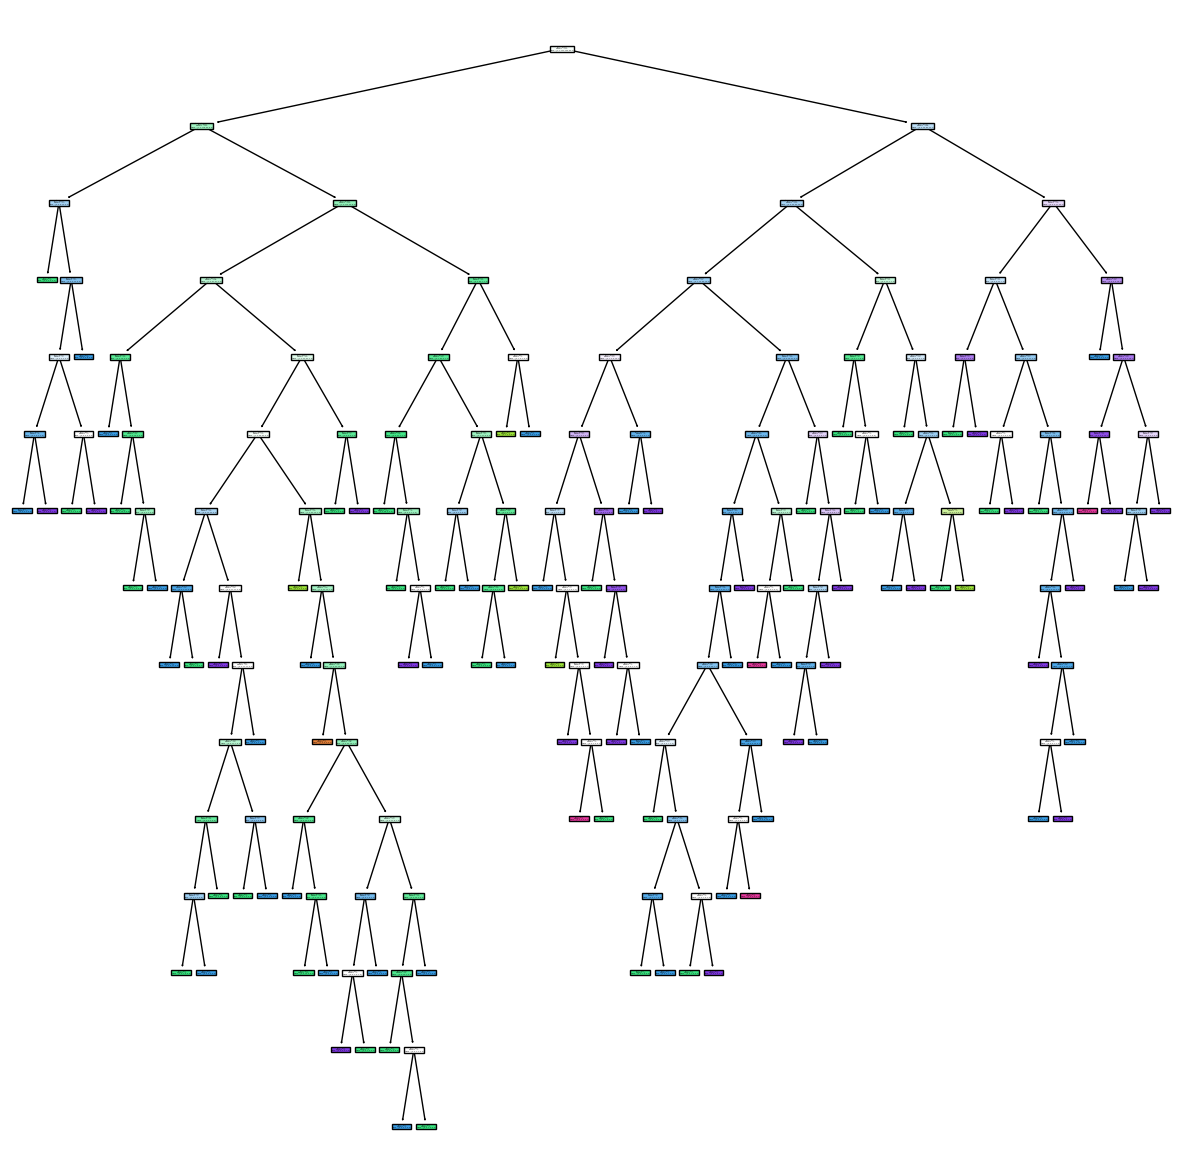

In [17]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True, feature_names=clf.feature_names_in_)

In [18]:
print(f"Tree Depth: {clf.get_depth()} Total leaves: {clf.get_n_leaves()} ")

Tree Depth: 14 Total leaves: 98 


In [19]:
X = df.drop(columns=['quality','Id'],axis=1)
# X = df[['alcohol','sulphates','citric acid']]
y = df['quality'].apply(lambda y_value: 1 if y_value >= 5 else 0)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.3,random_state=42)

In [21]:
clf = DecisionTreeClassifier(max_depth=3)

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
y_pred_en = clf.predict(X_test)
y_pred_en

y_pred_train = clf.predict(X_train)
y_pred_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
print(f"Test Accuracy: {accuracy_score(y_test,y_pred_en)*100}")
print(clf.score(X_test,y_test))

Test Accuracy: 95.38077403245943
0.9538077403245943


In [25]:
print(f"Train Accuracy: {accuracy_score(y_train,y_pred_train)*100}")
print(clf.score(X_train,y_train))

Train Accuracy: 99.12280701754386
0.9912280701754386


[Text(0.5555555555555556, 0.875, 'volatile acidity <= 0.97\ngini = 0.046\nsamples = 342\nvalue = [8, 334]'),
 Text(0.3333333333333333, 0.625, 'citric acid <= 0.87\ngini = 0.029\nsamples = 334\nvalue = [5, 329]'),
 Text(0.2222222222222222, 0.375, 'pH <= 3.81\ngini = 0.024\nsamples = 333\nvalue = [4, 329]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.018\nsamples = 332\nvalue = [3, 329]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.625, 'free sulfur dioxide <= 16.0\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

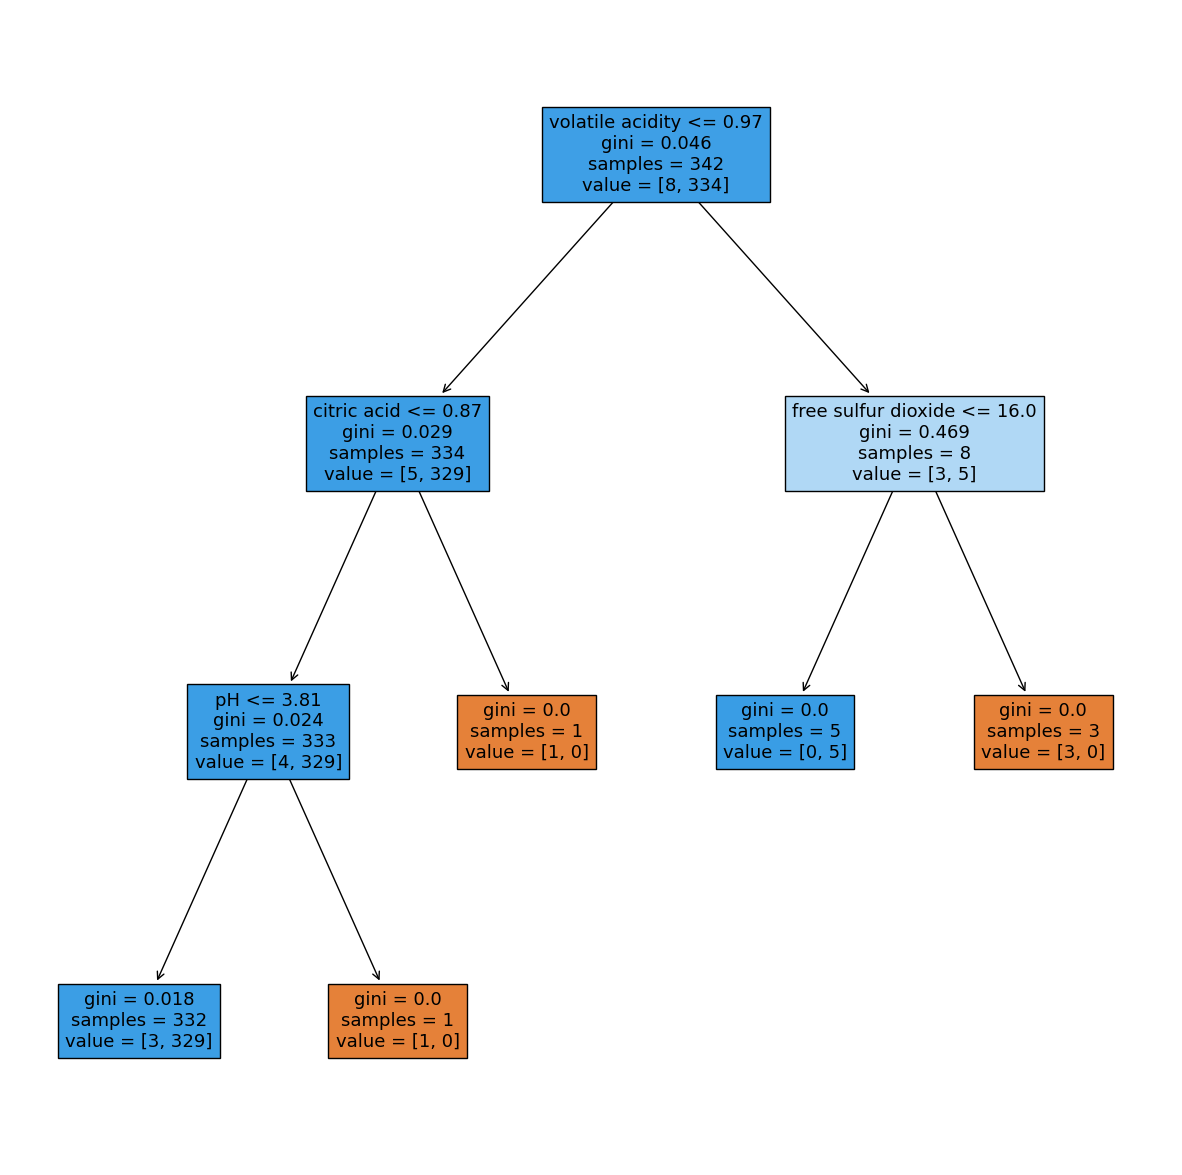

In [26]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True, feature_names=clf.feature_names_in_)